In [1]:
%pwd

'd:\\Projects\\Alzeimer\\Alzheimer-s-Disease-Detection\\research'

In [2]:
import os
os.chdir("../")
%pwd

'd:\\Projects\\Alzeimer\\Alzheimer-s-Disease-Detection'

In [3]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt
from IPython.display import HTML
try:
    # Disable all GPUS
    tf.config.set_visible_devices([], 'GPU')
    visible_devices = tf.config.get_visible_devices()
    for device in visible_devices:
        assert device.device_type != 'GPU'
except:
    # Invalid device or cannot modify virtual devices once initialized.
    pass

physical_devices = tf.config.list_physical_devices('GPU')

tf.test.is_gpu_available(
    cuda_only=True, min_cuda_compute_capability=None
)
tf.config.get_visible_devices(
    device_type=None
)

Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.


[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]

In [9]:
BATCH_SIZE = 32
IMAGE_SIZE = 180
CHANNELS=3
EPOCHS=10

In [10]:
train_path =r'artifacts\06_25_2023_23_27_53\data_ingestion\train'
test_path = r'artifacts\06_25_2023_23_27_53\data_ingestion\test'

In [6]:
train_dataset = tf.keras.preprocessing.image_dataset_from_directory(
                                                            train_path,
                                                            seed=12,
                                                            shuffle=True,
                                                            image_size=(IMAGE_SIZE, IMAGE_SIZE),
                                                            batch_size=BATCH_SIZE,
                                                            validation_split=0.2,  # Specify the validation split ratio
                                                            subset="training"  # Specify that this is the training set
                                                        )


validation_dataset = tf.keras.preprocessing.image_dataset_from_directory(
                                                                train_path,
                                                                seed=12,
                                                                shuffle=True,
                                                                image_size=(IMAGE_SIZE, IMAGE_SIZE),
                                                                batch_size=BATCH_SIZE,
                                                                validation_split=0.2,  # Specify the validation split ratio
                                                                subset="validation"  # Specify that this is the validation set
                                                                )


test = tf.keras.preprocessing.image_dataset_from_directory(test_path, 
                                                             seed=12, 
                                                             shuffle=True, 
                                                             image_size=(IMAGE_SIZE,IMAGE_SIZE),
                                                             batch_size=BATCH_SIZE)

Found 1101 files belonging to 5 classes.
Using 881 files for training.
Found 1101 files belonging to 5 classes.
Using 220 files for validation.
Found 195 files belonging to 5 classes.


In [11]:
Name_of_the_classes = train_dataset.class_names

In [ ]:
Name_of_the_classes

['Final AD JPEG',
 'Final CN JPEG',
 'Final EMCI JPEG',
 'Final LMCI JPEG',
 'Final MCI JPEG']

(32, 180, 180, 3)
[3 0 4 0 2 4 1 1 4 0 2 1 1 1 1 3 2 2 0 4 1 4 1 1 2 2 1 0 2 1 2 4]


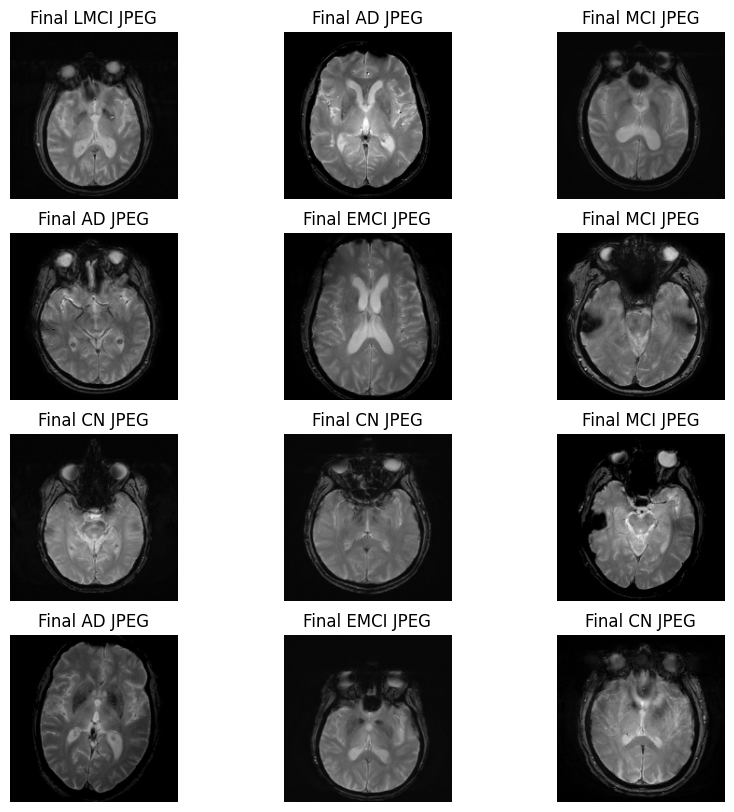

In [16]:
plt.figure(figsize=(10,10))
for image_batch, laabels_batch in train.take(1):
    print(image_batch.shape)
    print(laabels_batch.numpy())
    for i in range(12):
        ax = plt.subplot(4,3,i+1)
        plt.axis('off')
        plt.title(Name_of_the_classes[laabels_batch[i]])
        plt.imshow(image_batch[i].numpy().astype('uint8'))

In [17]:
train_ds = train_dataset.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds = test.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds = validation_dataset.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [19]:
resize_and_rescale = tf.keras.Sequential([
  layers.Resizing(IMAGE_SIZE, IMAGE_SIZE),
  layers.Rescaling(1./255)
])
data_augmentation = tf.keras.Sequential([
  layers.RandomFlip("horizontal_and_vertical"),
  layers.RandomRotation(0.2),
])

In [8]:
input_shape = (BATCH_SIZE,IMAGE_SIZE,IMAGE_SIZE,CHANNELS)
base_model = tf.keras.applications.DenseNet121(input_shape=input_shape, include_top=False, weights='imagenet')
base_model.trainable = False



model = models.Sequential(

[
    resize_and_rescale,
    data_augmentation,
    base_model,  # Add the pre-trained DenseNet model
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Conv2D(32,kernel_size=(3,3), activation='relu' , input_shape = input_shape) ,
    tf.keras.layers.MaxPool2D((2,2)),
    tf.keras.layers.Conv2D(64,kernel_size=(3,3), activation='relu' ) ,
    tf.keras.layers.MaxPool2D((2,2)),
    tf.keras.layers.Conv2D(128,kernel_size=(3,3), activation='relu' ) ,
     tf.keras.layers.MaxPool2D((2,2)),
     tf.keras.layers.Conv2D(128,kernel_size=(3,3), activation='relu' ) ,
     tf.keras.layers.MaxPool2D((2,2)),
    tf.keras.layers.Conv2D(512,kernel_size=(3,3), activation='relu' ) ,
     tf.keras.layers.MaxPool2D((2,2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(5,activation='softmax')


    
]
)

ValueError: `input_shape` must be a tuple of three integers.

In [21]:
model.compile(
    
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
             )

In [22]:
history = model.fit(train_ds,
         batch_size=BATCH_SIZE, 
         validation_data=val_ds,
         verbose=1,
         epochs= 10)

Epoch 1/20
35/35 [==============================] - 69s 2s/step - loss: 1.4612 - accuracy: 0.4478
Epoch 2/20
35/35 [==============================] - 63s 2s/step - loss: 1.4359 - accuracy: 0.4478
Epoch 3/20
35/35 [==============================] - 68s 2s/step - loss: 1.4345 - accuracy: 0.4478
Epoch 4/20
35/35 [==============================] - 74s 2s/step - loss: 1.4164 - accuracy: 0.4478
Epoch 5/20
15/35 [===========>..................] - ETA: 45s - loss: 1.4033 - accuracy: 0.4625

KeyboardInterrupt: 